<a href="https://colab.research.google.com/github/lumagri/Python_to_Data_Science/blob/main/8_DataScience_analises_de_series_temporais/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alucar - Analisando as vendas


In [1]:
import pandas as pd


In [2]:
pd.read_csv('alucar.csv').head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [3]:
alucar = pd.read_csv('alucar.csv')

In [4]:
print('Quantidade de linhas e columas:', alucar.shape) 
#Se há 24 registros, significa que há dados referentes a de 2 anos 

Quantidade de linhas e columas: (24, 2)


In [5]:
print('Quantidade de dados nulos:', alucar.isna().sum().sum())

Quantidade de dados nulos: 0


In [6]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [7]:
#convertendo object em date
alucar['mes'] = pd.to_datetime(alucar['mes']) 
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [8]:
from ast import increment_lineno
!pip install seaborn==0.9.0
import seaborn as sns
%matplotlib inline 
from matplotlib import pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.1/208.1 KB 5.1 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [9]:
print(sns.__version__)

0.9.0


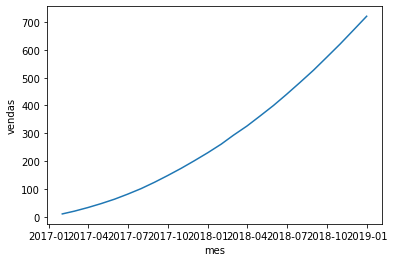

In [10]:
sns.lineplot(x='mes', y='vendas', data= alucar)

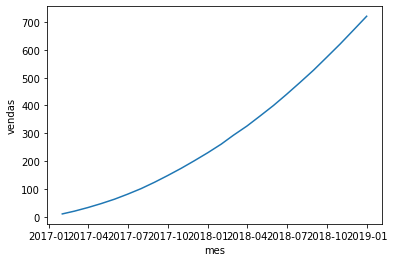

In [11]:
sns.lineplot(x='mes', y='vendas', data= alucar)

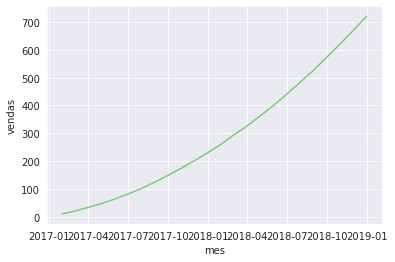

In [12]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
sns.lineplot(x='mes', y='vendas', data= alucar)

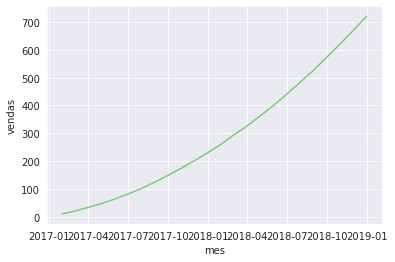

In [13]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data= alucar)


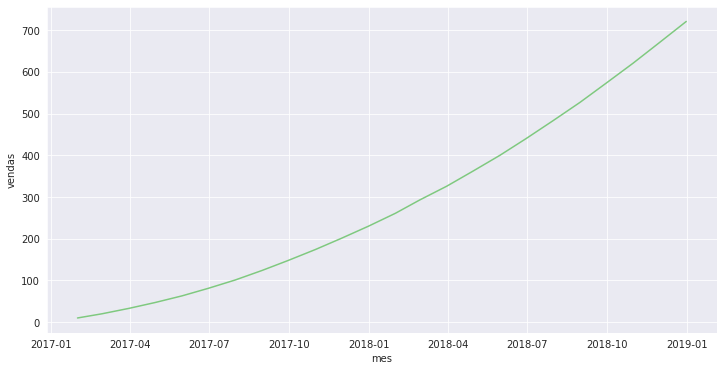

In [14]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data= alucar)
# para retirar o texto que fica acima do gráfico, insira-o em uma variável
ax.figure.set_size_inches(12,6) #para alterar o tamanho do gráfico

Text(0.0, 1.0, 'Vendas Alcar de 2017 e 2018')

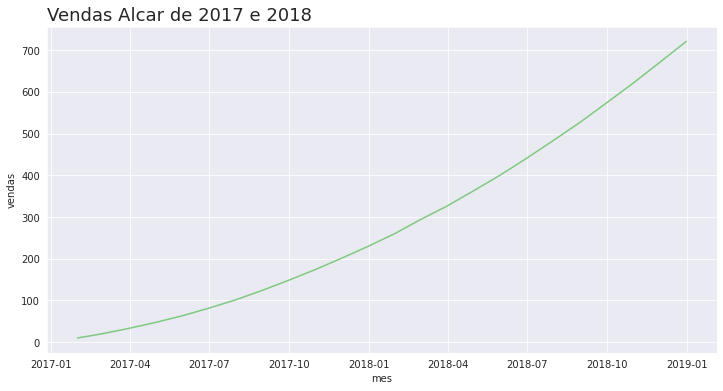

In [15]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data= alucar)
# para retirar o texto que fica acima do gráfico, insira-o em uma variável.
ax.figure.set_size_inches(12,6) #para alterar o tamanho do gráfico.
ax.set_title('Vendas Alcar de 2017 e 2018', loc = 'left', fontsize=18) 
#para inserir o título, centralização e tamanho da fonte.

Text(0, 0.5, 'Vendas (R$)')

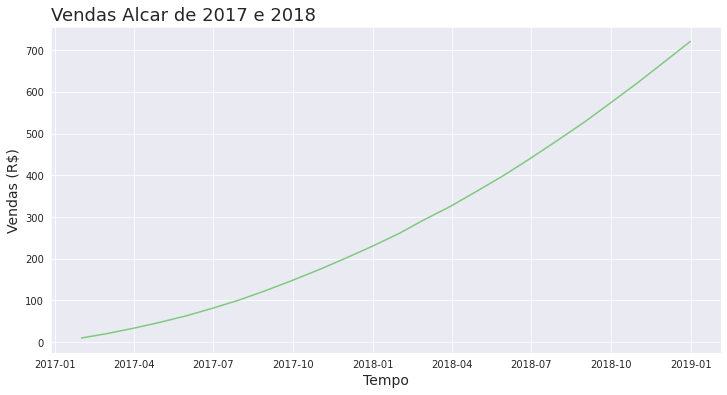

In [16]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data= alucar)
# para retirar o texto que fica acima do gráfico, insira-o em uma variável.
ax.figure.set_size_inches(12,6) #para alterar o tamanho do gráfico.
ax.set_title('Vendas Alcar de 2017 e 2018', loc = 'left', fontsize=18) 
#para inserir o título, centralização e tamanho da fonte.
ax.set_xlabel('Tempo', fontsize=14) #para ajustar o tamanho das label do eixo X
ax.set_ylabel('Vendas (R$)', fontsize=14) #para ajustar o tamanho das label do eixo Y

In [17]:
alucar.head() #quanto aumentou de 1 mês para o outro? 
#mês 2 - mês 1, mês 3 - mês 3 e assim por diante 

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [18]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head() #com a função .diff temos a diferença entres cada mês. 

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


Text(0, 0.5, 'Aumento')

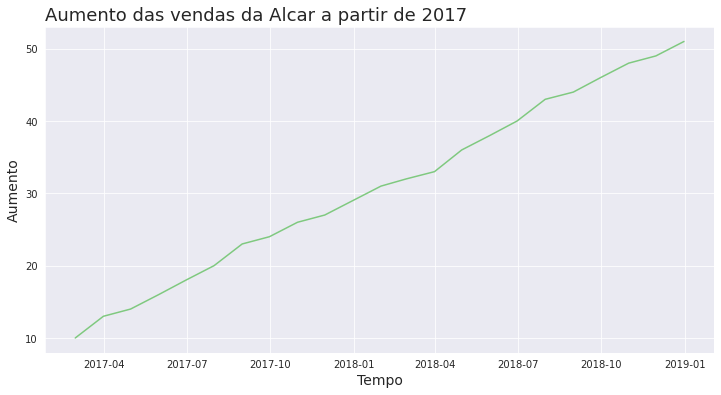

In [19]:
#para apresentar o aumento das vendas. 
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data= alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das vendas da Alcar a partir de 2017', loc = 'left', fontsize=18) 
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)

#para ficar mais fácil de plotar esse gráfico pode-se criar uma função. 

In [20]:
def grafico(titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data=dataset) # os valores são alterados para receber os valores que forem passados como parâmetro.
  ax.figure.set_size_inches(12,6)
  ax.set_title(titulo, loc = 'left', fontsize=18) 
  ax.set_xlabel(labelx, fontsize=14)
  ax.set_ylabel(labely, fontsize=14)
  ax = ax

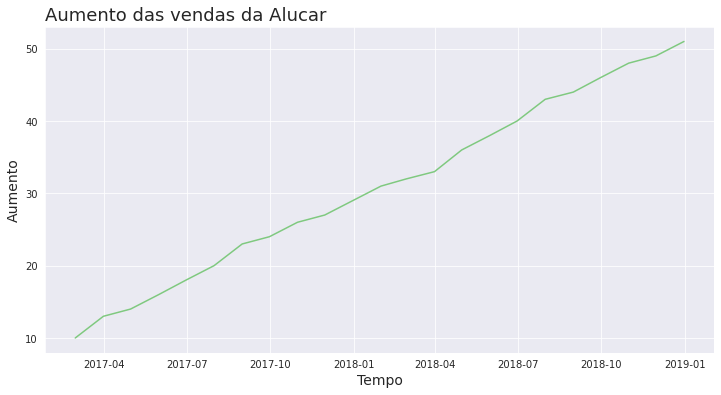

In [21]:
grafico('Aumento das vendas da Alucar', 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

In [22]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


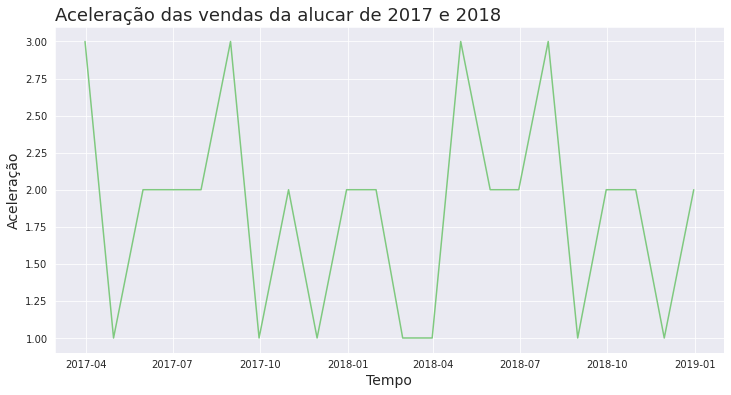

In [23]:
grafico('Aceleração das vendas da alucar de 2017 e 2018', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)

Criando uma função que une as informações dos 3 gráficos criados: 
def plot_comparacao

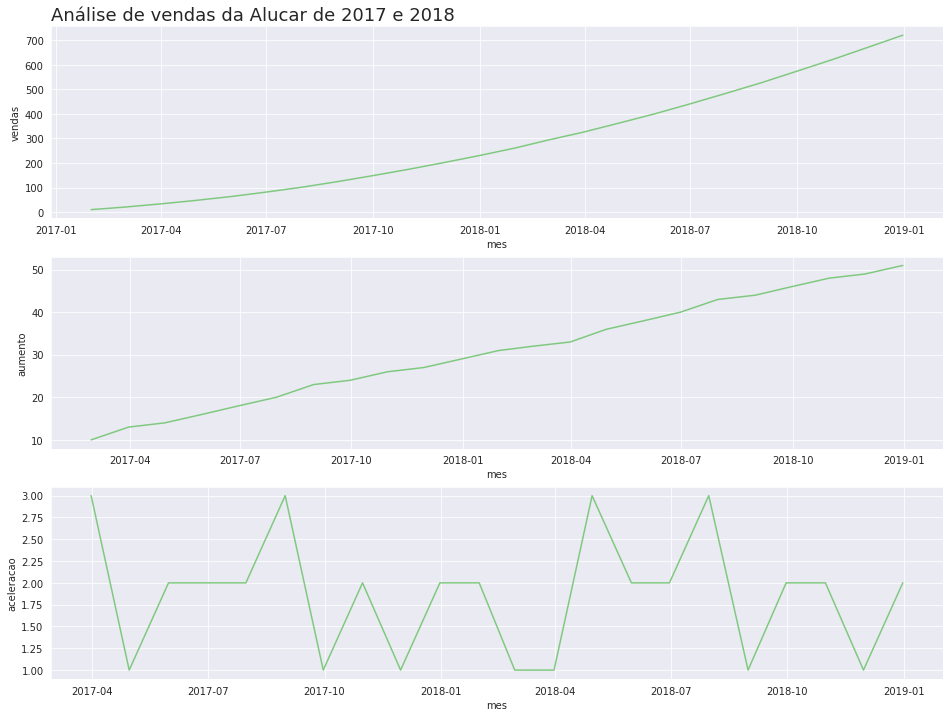

In [24]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise de vendas da Alucar de 2017 e 2018', fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data= alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data= alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data= alucar)
ax = ax


In [25]:
def plot_comparacao(x, y1, y2, y3, titulo,dataset):
  plt.figure(figsize=(16,12))
  ax = plt.subplot(3,1,1)
  ax.set_title(titulo, fontsize=18, loc='left')
  sns.lineplot(x=x, y=y1, data=dataset)
  plt.subplot(3,1,2)
  sns.lineplot(x=x, y=y2, data=dataset)
  plt.subplot(3,1,3)
  sns.lineplot(x=x, y=y3, data=dataset)
  ax = ax

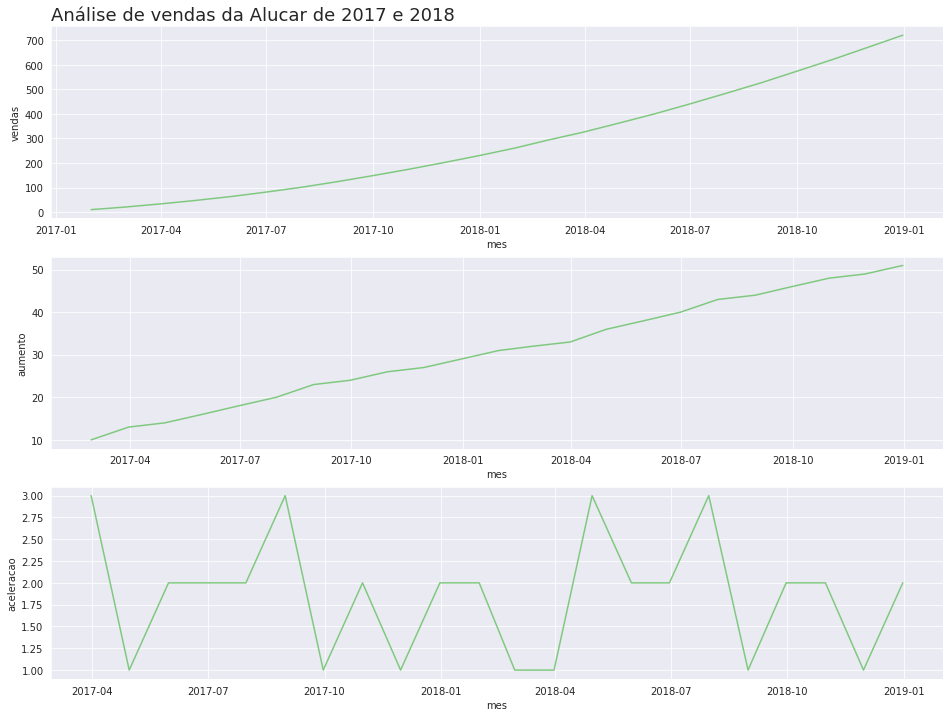

In [26]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', 'Análise de vendas da Alucar de 2017 e 2018', alucar)

#Autocorrelação
Comparação dos valores com suas próprias correlações. Cada passo dado pelo gráfico de correlação será chamado de Lag.

In [27]:
from pandas.plotting import autocorrelation_plot

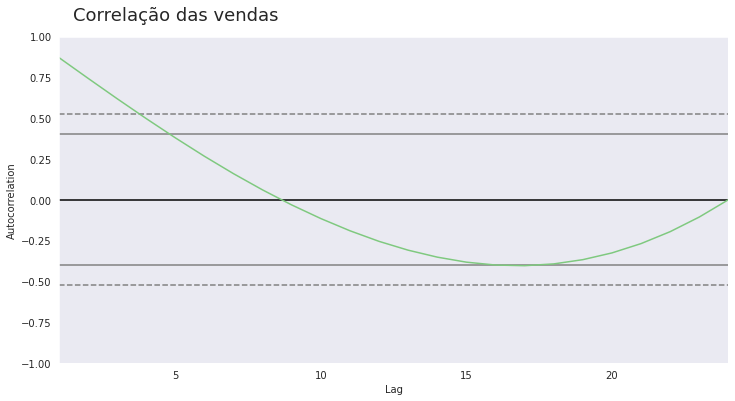

In [28]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

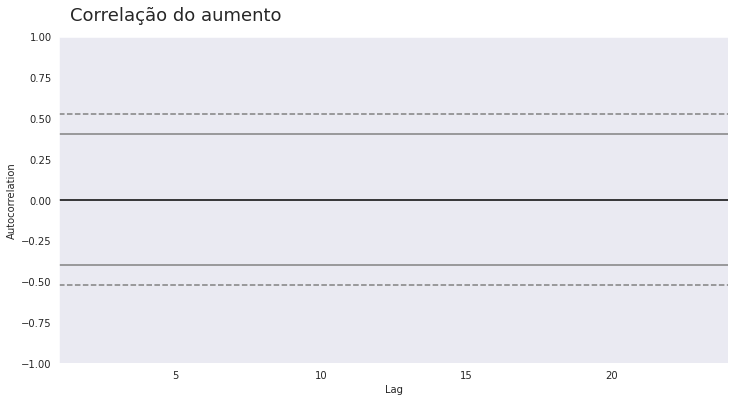

In [29]:
#Como o gráfico de aumento e de aceleração iniciam no indice 1 e 2, é necessário
#passar também o número do indice inicial para que seja apresentada a correlação

ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'])
ax = ax

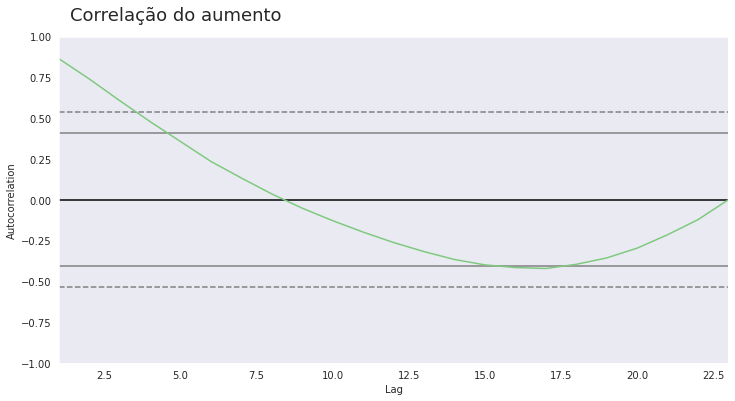

In [30]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])#inseri a posição inicial para aumento
ax = ax

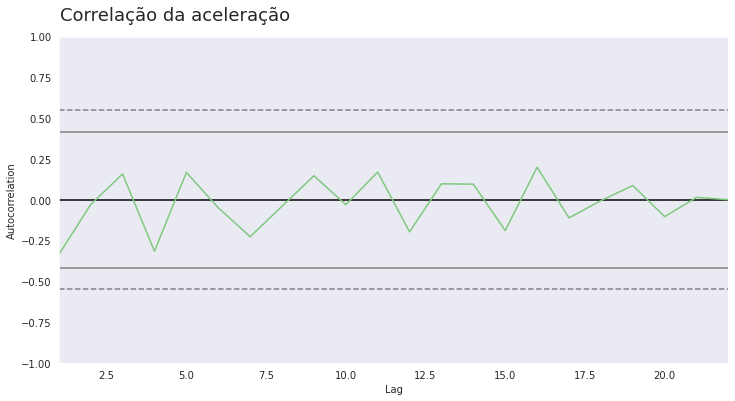

In [31]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])#inseri a posição inicial para aceleração
ax = ax

#Analisando o número de assinantes da newsletter

In [32]:
assinantes = pd.read_csv('newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [33]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [34]:
print('Quantidade de linhas e colunas:', assinantes.shape)
print('Quantidade de dados nulos:', assinantes.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


In [35]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])#convertendo para datetime
assinantes.dtypes


mes           datetime64[ns]
assinantes             int64
dtype: object

In [36]:
#Decompondo assinantes em aumento e depois em aceleração. 
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()


,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


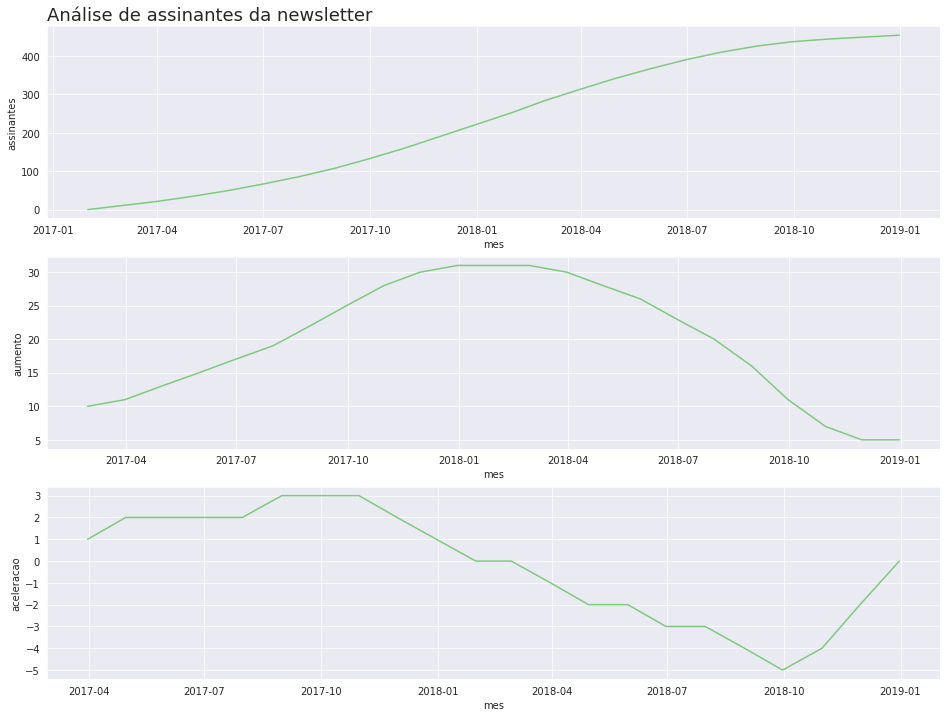

In [37]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao',
                'Análise de assinantes da newsletter', assinantes)

#Análise de Sazonalidade
dados da Chocolura 

In [38]:
chocolura = pd.read_csv('chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [39]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [40]:
chocolura['mes'] = pd.to_datetime(chocolura['mes']) 
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [41]:
print('Quantidade linhas e colunas:', chocolura.shape)
print('Quantidade de dados nulos em chocolura:', chocolura.isna().sum().sum())

Quantidade linhas e colunas: (24, 2)
Quantidade de dados nulos em chocolura: 0


In [42]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


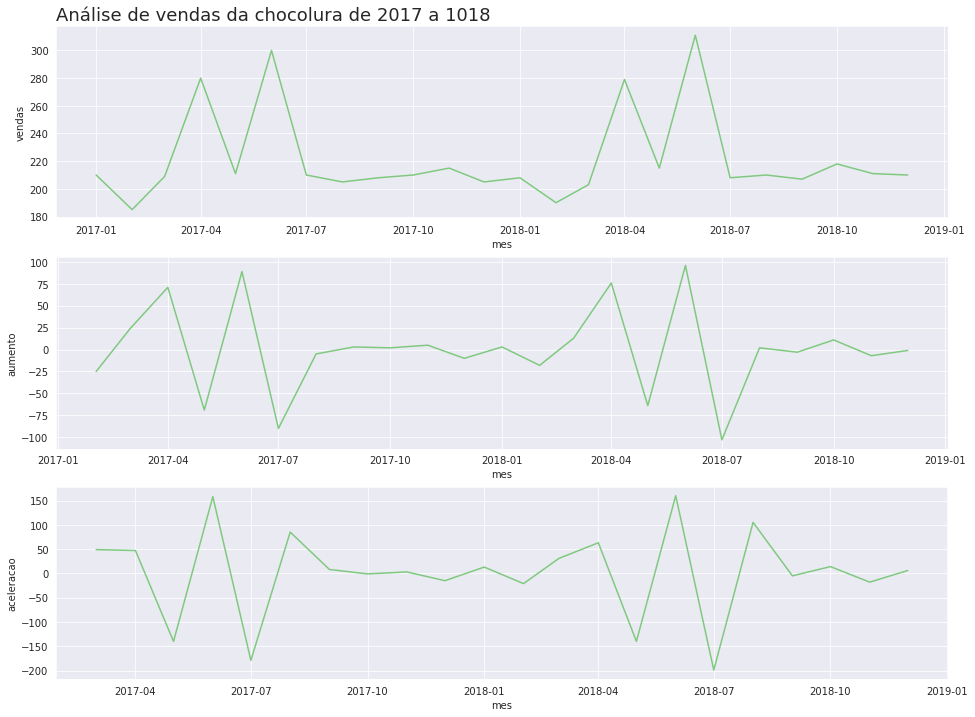

In [43]:
plot_comparacao('mes','vendas','aumento','aceleracao', 'Análise de vendas da chocolura de 2017 a 1018', chocolura )

Sazonalidade é um padrão repetitivo dentro de um período de tempo. Neste exemplo é possível ver que há um aumento nas vendas  nos meses de março e julho de cada ano. 

#Chocolura - Vendas diárias de Outubro e Novembro

In [44]:
vendas_por_dia = pd.read_csv('vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [45]:
print('Quantidade de linhas e colunas:', vendas_por_dia.shape)
print('Quantidade de dados nulos: ', vendas_por_dia.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos:  0


In [46]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [47]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [48]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


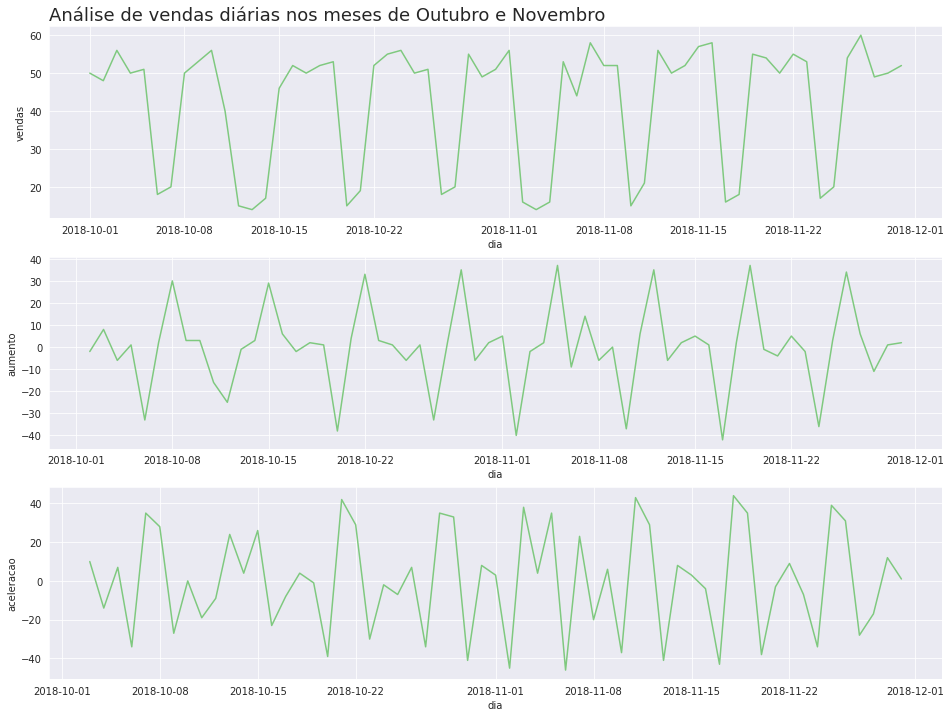

In [49]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao','Análise de vendas diárias nos meses de Outubro e Novembro', vendas_por_dia)

**Analisando a sazonalidade**

In [50]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [51]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [52]:
dias_traduzidos = {'Monday':'Segunda', 
                   'Tuesday':'Terça',
                   'Wednesday':'Quarta',
                   'Thursday':'Quinta',
                   'Friday':'Sexta',
                   'Saturday':'Sabado',
                   'Sunday':'Domingo'}

In [53]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos) 
vendas_por_dia.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sabado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terça
9,2018-10-10,56,3.0,0.0,Quarta


**Agrupando os dias**

In [54]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento','aceleracao'].mean().round()

<ipython-input-54-a97c16f425ec>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento','aceleracao'].mean().round()


In [55]:
vendas_agrupadas.head(7)

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Terça,52.0,-1.0,-34.0


#Correlação das vendas diárias

A auto correlação não nos retorna apenas a informação da sazonalidade no conjunto de dados. A autocorrelação ela informa se o evento que aparentemente é sazonal aconteceu de uma forma determinística, ou seja, que ele é sim um evento que se repete de tempos em tempos. Se tivéssemos obtido apenas baixos valores de autocorrelação poderíamos sugerir que os eventos aparentemente sazonais eram, na verdade, aleatórios

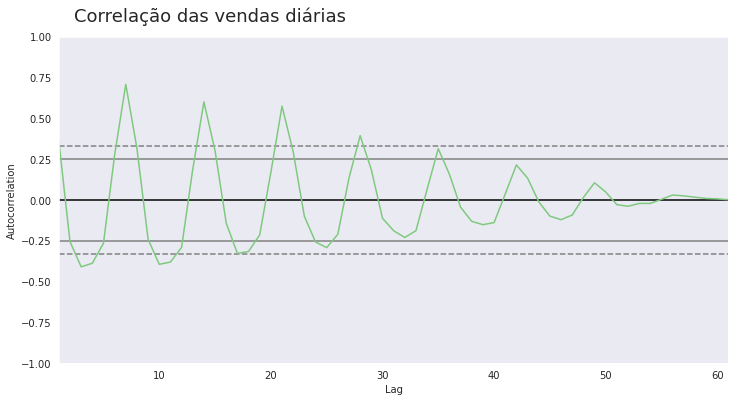

In [56]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

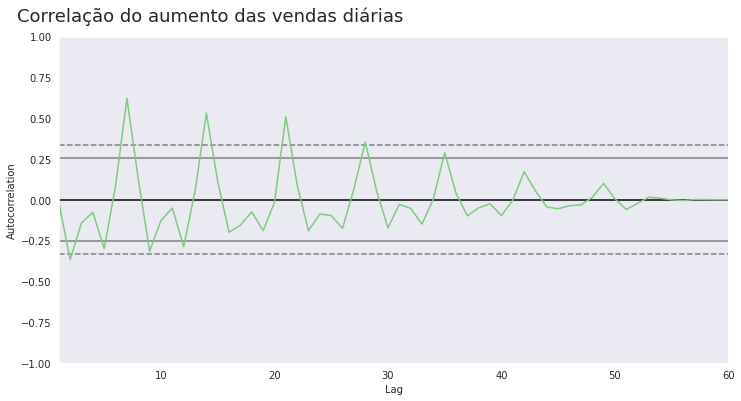

In [57]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

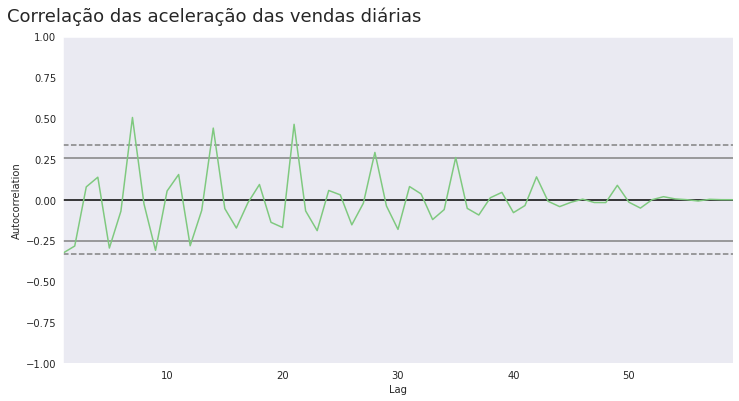

In [58]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das aceleração das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

#Cafelura - Análise de vendas

In [59]:
cafelura = pd.read_csv('cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [60]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [61]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [62]:
print('Quantidade de linhas e colunas:', cafelura.shape)
print('Quantidade de dados nulos', cafelura.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos 0


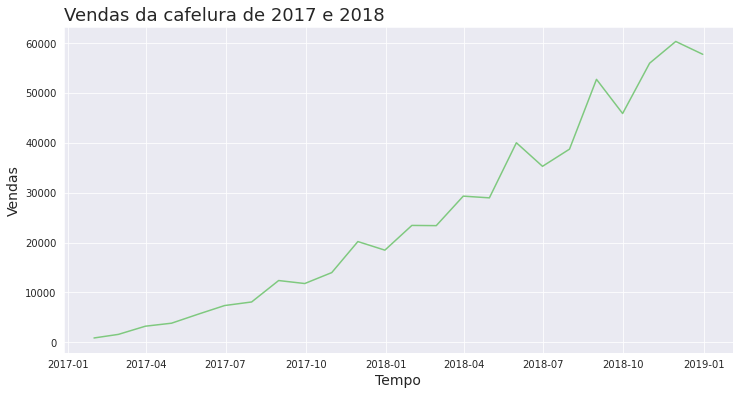

In [63]:
grafico('Vendas da cafelura de 2017 e 2018', 'Tempo', 'Vendas', 'mes','vendas', cafelura )

In [64]:
quantidade_de_dias_de_fds = pd.read_csv('dias_final_de_semana.csv')
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [65]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [66]:
cafelura['vendas_normalizadas'] = cafelura['vendas']/ quantidade_de_dias_de_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


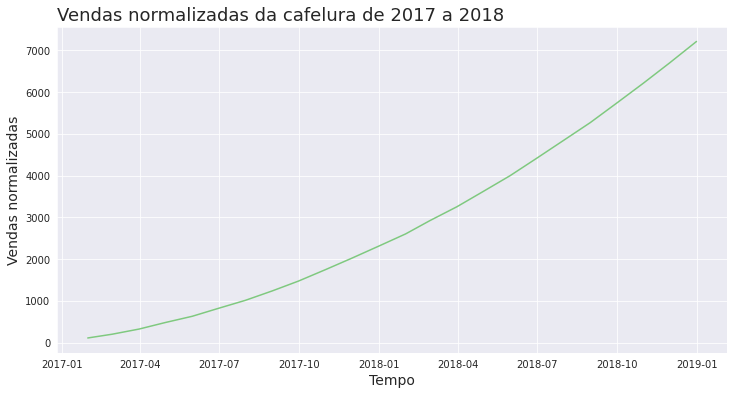

In [67]:
grafico('Vendas normalizadas da cafelura de 2017 a 2018', 
        'Tempo', 'Vendas normalizadas', 'mes', 'vendas_normalizadas', cafelura)

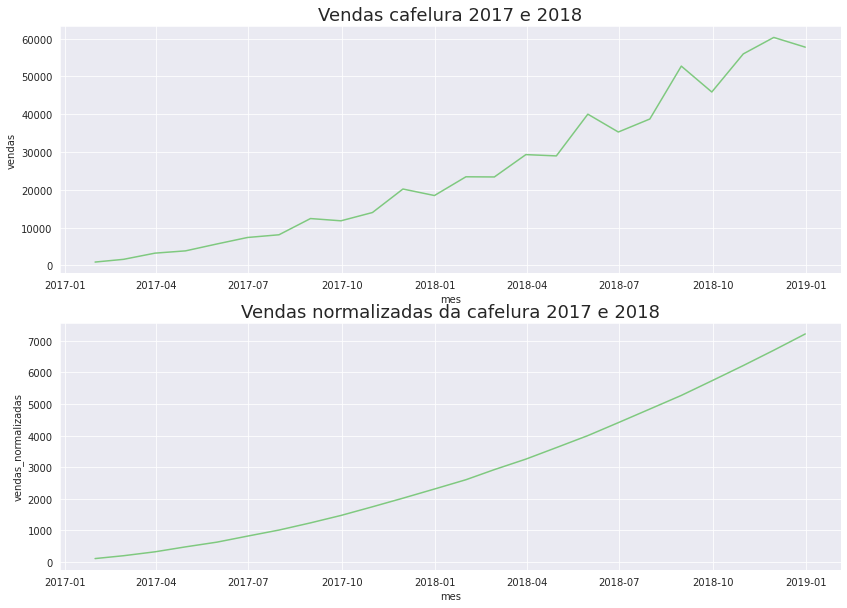

In [68]:
plt.figure(figsize=(14,10))
ax = plt.subplot(2,1,1)
ax.set_title('Vendas cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax = plt.subplot(2,1,2)
ax.set_title('Vendas normalizadas da cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax=ax

#Statdmodels

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose

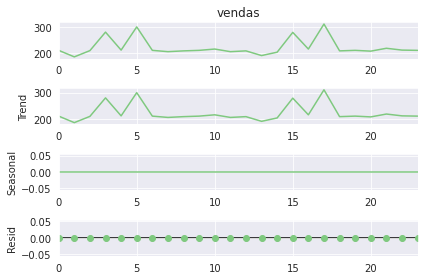

In [70]:
resultado = seasonal_decompose(chocolura['vendas'], period=1)
ax = resultado.plot()

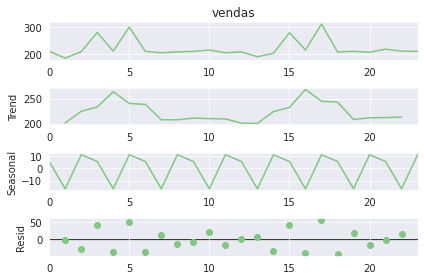

In [71]:
resultado = seasonal_decompose(chocolura['vendas'], period=3)
ax = resultado.plot()

In [72]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [73]:
data = ({
    'observacao':observacao,
    'tendencia':tendencia,
    'sazonalidade':sazonalidade, 
    'ruido':ruido
})

resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


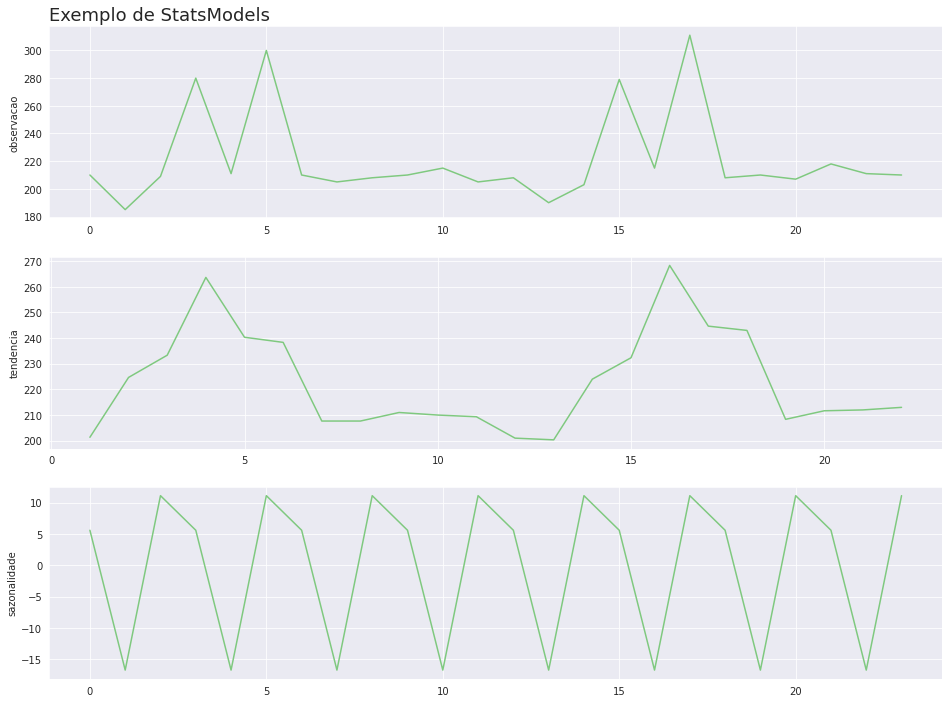

In [74]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', 'Exemplo de StatsModels', resultado)

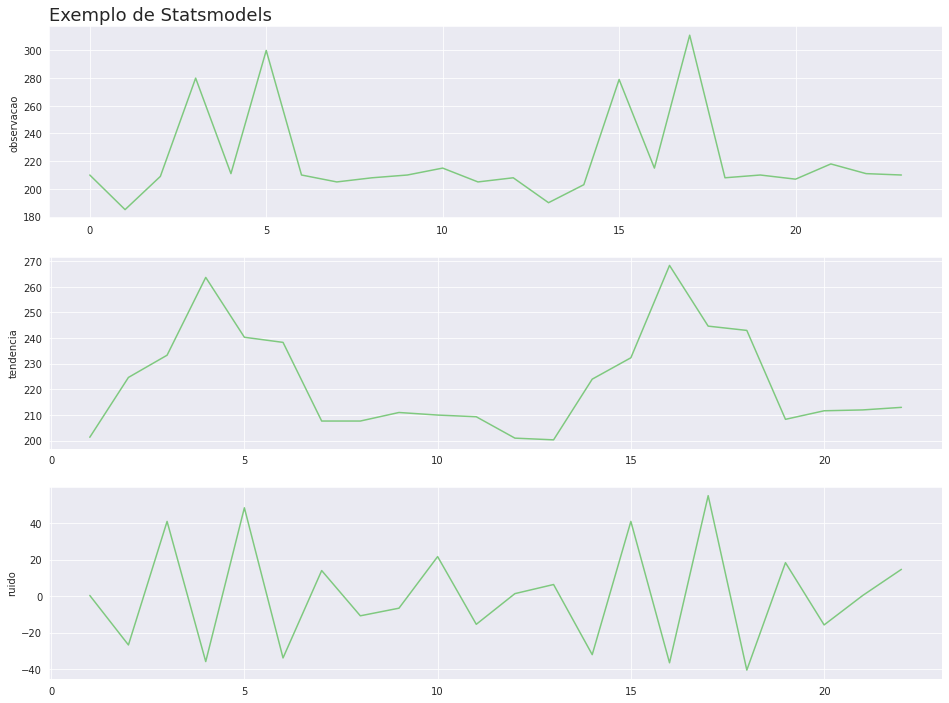

In [75]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'ruido', 'Exemplo de Statsmodels', resultado)

#Alucel - Análise de vendas

In [76]:
alucel = pd.read_csv('alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [77]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [80]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [81]:
print('Quantidade de linhas e colunas:', alucel.shape)
print('Quantidade de dados nulos:', alucel.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [82]:
alucel['aumento'] = alucel ['vendas'].diff()
alucel['aceleracao'] = alucel ['aumento'].diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


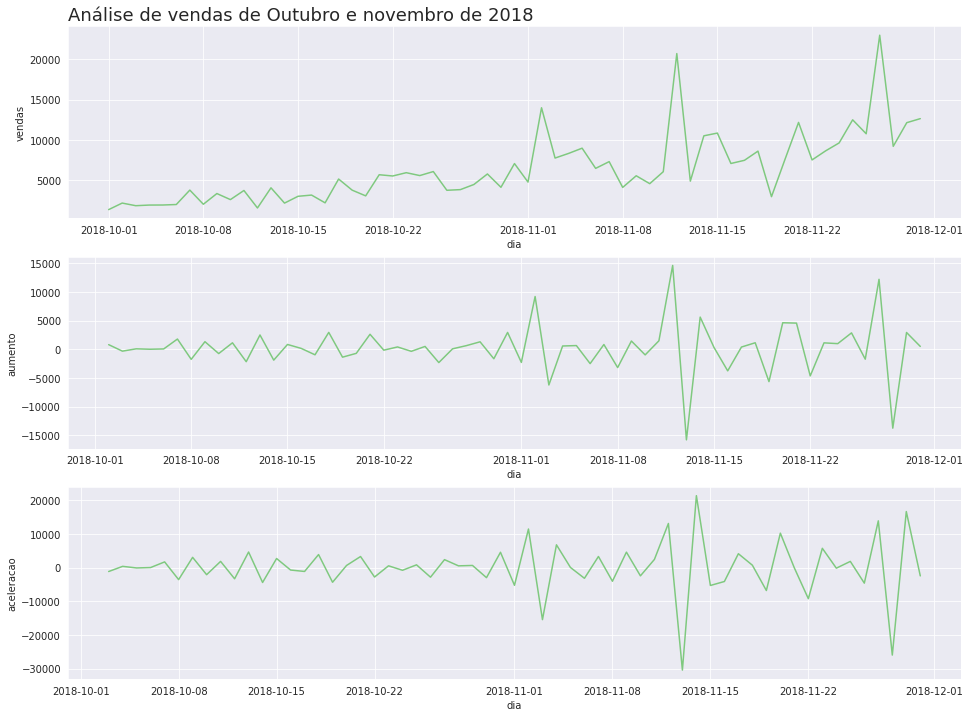

In [83]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', 
                'Análise de vendas de Outubro e novembro de 2018', alucel)